# Fake-News-Detection-NLP





 


Rund-um-die-Corona-Impfung-gibt-es-viele-Fakten-und-auch-193003h.jpg

Source of image is [here](https://www.aerztezeitung.de/Politik/Corona-Impfungen-Mit-Fakten-gegen-Fake-News-416444.html).


### Project Repo 
Project Repo on [Github](https://github.com/jendrikstahnke/Fake-News-Detection-NLP)

### Dataset
Dataset from kaggle : fake_and_real_news_[Dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).


## Participants:
Garima Arora, Jendrik Stahnke and Manpreet Singh 

### Course and Semester
Opencampus Course *Deep Learning from Scratch* in *summer-semester-2021*

### Tasks on the dataset

*   Task 0: Do data preprocessing
*   Task 1: Develop three different models
*   Task 2: Train and test the individual models on the raw dataset
*   Task 3: Train and test the individual models on the cleaned dataset
*   Task 4: Compare the accuracy from the six different results 

### License
No License

---

# Getting started
In the first step, we set up the working environment. Load our datasets and explore it.


## Set-Up Workspace Environment
First of all, we need access to our data set. This can be downloaded from Kaggle and comes in two different CSV files. In order to be able to access these files in Colab, we decided to use the method of importing Google Drive as a workspace. The dataset can be uploaded to Drive just like normal files. After mounting your own drive in Colab, you can access the files.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/Master/OpenCampus/DeepLearning/Fake_News_Dataset_Option_1/Test"

data_dir = "/content/gdrive/My Drive/Master/OpenCampus/DeepLearning/Fake_News_Dataset_Option_1/Test"

fake_data_path = data_dir + "/Fake.csv"
true_data_path = data_dir + "/True.csv"


Mounted at /content/gdrive
Fake.csv  fake-news.jpg  model_after_5_epochs.h5  True.csv


In [3]:
import pandas as pd
fake_data = pd.read_csv(fake_data_path)
true_data = pd.read_csv(true_data_path)

## Explore the Datasets
For data exploring we use [pandas](https://pandas.pydata.org/docs/), because it provides us with easy to use data analysis tools. After importing we can access both datasets with the *read_csv* method from *pandas*. It returns us a easy to use 2D data structure object with labeld axes, which we need in the next step to explore it.

In [4]:
import pandas as pd

fake_data = pd.read_csv(fake_data_path)
true_data = pd.read_csv(true_data_path)

### Exploring True-News-Dataset
As mentioned at the beginning, the data comes in two separate files. At first, we will only look at the True News dataset. The *display* method from the Ipython library provides better output than *print*. We can now use the *sample* method to display random rows of the newly created object of the dataset. The number of rows displayed can be varied via the passing parameter *n* of the method.

In [5]:
from IPython.display import display

display('Header from True-News')
display(true_data.head(n=50))

'Header from True-News'

title  \
0   As U.S. budget fight looms, Republicans flip t...   
1   U.S. military to accept transgender recruits o...   
2   Senior U.S. Republican senator: 'Let Mr. Muell...   
3   FBI Russia probe helped by Australian diplomat...   
4   Trump wants Postal Service to charge 'much mor...   
5   White House, Congress prepare for talks on spe...   
6   Trump says Russia probe will be fair, but time...   
7   Factbox: Trump on Twitter (Dec 29) - Approval ...   
8          Trump on Twitter (Dec 28) - Global Warming   
9   Alabama official to certify Senator-elect Jone...   
10  Jones certified U.S. Senate winner despite Moo...   
11  New York governor questions the constitutional...   
12  Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13     Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14  Man says he delivered manure to Mnuchin to pro...   
15  Virginia officials postpone lottery drawing to...   
16  U.S. lawmakers question businessman at 2016 Tr...   
17  Trump on Twitter (Dec 26) - Hillary Clinton, T...   
18  U.S. appeals court rejects challenge to Trump ...   
19  Treasury Secretary Mnuchin was sent gift-wrapp...   
20  Federal judge partially lifts Trump's latest r...   
21  Exclusive: U.S. memo weakens guidelines for pr...   
22  Trump travel ban should not apply to people wi...   
23  Second court rejects Trump bid to stop transge...   
24  Failed vote to oust president shakes up Peru's...   
25  Trump signs tax, government spending bills int...   
26  Companies have up to a year for new U.S. tax b...   
27  Trump on Twitter (Dec 22) - Tax cut, Missile d...   
28  Mexico to review need for tax changes after U....   
29  Senate leader McConnell sees a more collegial ...   
30  Alabama to certify Democrat Jones winner of Se...   
31  McConnell happier with Trump tweets after tax ...   
32  House panel asks Trump ex-top aide Bannon to t...   
33  Callista Gingrich becomes Trump's envoy to pop...   
34  As Republicans aim to ride economy to election...   
35  Exclusive: State Department tells refugee agen...   
36  Congress votes to avert shutdown, sends Trump ...   
37  Factbox: Big-ticket items at center of Congres...   
38  In victory for Trump, judge tosses suit on for...   
39  Senate shelves disaster aid bill until next month   
40   Trump on Twitter (Dec 21) - Tax Cuts, Home sales   
41  House widens ethics probe to include Farenthol...   
42  U.S. court rejects Trump bid to stop transgend...   
43   U.S. House approves $81 billion for disaster aid   
44  House Democrats rally to protect Special Couns...   
45  Second U.S. judge blocks Trump administration ...   
46  Senators seek to stop expansion of airport fac...   
47  U.S. launches effort to reduce reliance on imp...   
48  Short-term government funding, disaster aid bi...   
49  Spy chiefs pressure Congress to renew expiring...   

                                                 text       subject  \
0   WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1   WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2   WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3   WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4   SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5   WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6   WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7   The following statements were posted to the ve...  politicsNews   
8   The following statements were posted to the ve...  politicsNews   
9   WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   
10  (Reuters) - Alabama officials on Thursday cert...  politicsNews   
11  NEW YORK/WASHINGTON (Reuters) - The new U.S. t...  politicsNews   
12  The following statements were posted to the ve...  politicsNews   
13  The following statements were posted to the ve...  politicsNews   
14   (In Dec. 25 story, in second paragraph, corre...  politicsNews   
15  

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.countplot(true_data['subject'])

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

In [7]:
display(true_data.text[40])
display(true_data.text[27])

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - The Massive Tax Cuts, which the Fake News Media is desperate to write badly about so as to please their Democrat bosses, will soon be kicking in and will speak for themselves. Companies are already making big payments to workers. Dems want to raise taxes, hate these big Cuts! [0724 EST] - Was @foxandfriends just named the most influential show in news? You deserve it - three great people! The many Fake News Hate Shows should study your formula for success! [0745 EST] - Home Sales hit BEST numbers in 10 years! MAKE AMERICA GREAT AGAIN [0856 EST] - House Democrats want a SHUTDOWN for the holidays in order to distract from the very popular, just passed, Tax Cuts. House Republicans, don’t let this happen. Pass the C.R. TODAY and k

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Our big and very popular Tax Cut and Reform Bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. This is a phenomenon that nobody even thought of, and now it is the rage. Merry Christmas! [0747 EST] - At some point, and for the good of the country, I predict we will start working with the Democrats in a Bipartisan fashion. Infrastructure would be a perfect place to start. After having foolishly spent $7 trillion in the Middle East, it is time to start rebuilding our country! [0805 EST] - “The President has accomplished some absolutely historic things during this past year.” Thank you Charlie Kirk of Turning Points USA. Sadly, the Fake Mainstream Med

In [8]:
display(true_data.date.value_counts())

December 20, 2017     182
December 6, 2017      166
November 30, 2017     162
November 9, 2017      158
October 13, 2017      155
                     ... 
May 22, 2016            1
May 28, 2016            1
August 6, 2016          1
May 30, 2016            1
June 24, 2017           1
Name: date, Length: 716, dtype: int64

The head method has given us a first overview of the type of data, e.g. We see that the name of the newspaper and the city appear at the beginning of the text. When analysing this, the neural network could learn that, for example, all articles by 'Reuters' in the text are true, the data does not yet contain a label. We now want to explore the data set with further methods of the object. The *info* method and the *shape* method both provide further information about the form of the data set.

In [9]:
display('Infos from True-News')
display(true_data.info())

'Infos from True-News'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [10]:
rows_true_data, colums_true_data = true_data.shape
display(true_data.shape)

(21417, 4)

In [11]:
from collections import Counter
true_data['word_freq_list'] = true_data['text'].apply(lambda x: str(x).split())
top=Counter([word for li in true_data['word_freq_list'] for word in li])
freq_of_words_true_data=pd.DataFrame(top.most_common(100))
freq_of_words_true_data.columns=["most_common_words","frequency"]
freq_of_words_true_data.style.background_gradient(cmap='Blues')

In [12]:
import plotly.express as pe
#import plotly.figure_factory as ff
fig = pe.bar(freq_of_words_true_data, x="frequency", y="most_common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='most_common_words')
fig.show()

Another important step is to see if there are duplicate data in the dataset, and if so, how many. The *value_counts* mehtod can be applied to the individual rows of the dataset. We do this for both the *text* and the *title* and see that there are some duplicates in the dataset. 

In [13]:
rows_true_data_without_duplicates = true_data.text.value_counts()
display(rows_true_data_without_duplicates)
print("\nDuplicates in text: " + str(rows_true_data - len(rows_true_data_without_duplicates)))

(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be


Duplicates in text: 225


### Exploring Fake-News-Dataset

Now we apply all the methods just shown to the object of the fake news dataset and explore it.

In [14]:
display("Header from Fake-News")
display(fake_data.sample(n=50))

'Header from Fake-News'

title  \
15994  BROTHER OF SETH RICH Works For Cyber Security ...   
18138  SNOWFLAKE GOES BERSERK ON NYPD During the Rent...   
22093  Virginia Shooter Hodgkinson Was ‘Never Trump’ ...   
4651    Trump’s ‘Taco Truck’ Guy Spoke Again – Guaran...   
14475  HOOKERS FOR HILLARY: Why They’ve Got Her Back…...   
23320  Trump Attacks Hillary: “She is a world class l...   
8513    Trump Won’t Be At The Fox News Debate, Undero...   
4052    WATCH: Texas Judge Leaves Republican Party In...   
1307    Is It Really Wise For The President To Be Giv...   
22760  Boiler Room EP #131 – Gender Fluid Scouts, Hol...   
20002  CHIP OFF THE OLD BLOCK: Harvard Bound Malia Ob...   
16949  How We’re Being Tricked: Fiddling With Tempera...   
20039  LIBERAL SMACK DOWN OF THE DAY: Watch What Happ...   
22954  The Corporate Plantation: NCAA College Sports ...   
7       Trump Said Some INSANELY Racist Stuff Inside ...   
13632  HILLARY SHARES PRO-ILLEGAL MANIFESTO: Plans To...   
14501  THIRD DEGREE “BERN!” Why Denmark Is Telling Ma...   
22359        SUNDAY SCREENING: ‘In Debt We Trust’ (2007)   
1100    WATCH: Joy Reid OWNS Trump In Less Than 30 Se...   
22547  Who’s The Fascist? Barack Obama, Donald Trump ...   
5900    WATCH: FL Governor Refuses To Acknowledge Mas...   
18811  LOL! Democrats To Sue Over “Unprecedented Envi...   
16556  WHOA! Did Donald Trump Just Imply Obama Is Wor...   
14000  WHAT THESE YOUNG ILLEGAL ‘DREAMERS’ Do To Trum...   
12165  UK Diplomat Says He’s Met With DNC Leaker…They...   
11082  ONE VIDEO Perfectly Illustrates Why Liberals W...   
14831  U.S. Air Force Runs Out Of Bombs To Drop On IS...   
10050  WATCH: BLACK SPORTS HOST BLASTS White ESPN Spo...   
7045    Rick Scott Issues Bizarre Response To The Wom...   
5095    Nancy Pelosi Slams ‘Trumpian Stupidity’ And H...   
22540  Chicago Daycare Opens for ADULTS to Wear Diape...   
3959    FBI Is Investigating Itself After Its Twitter...   
21958  Episode #208 – ‘Not The Network’ – Sunday Wire...   
14023  BOOM! SMALL ALABAMA TOWN TAKES ON TARGET: Any ...   
4100    WATCH: ‘Weird Al’ Yankovic Relives The Third ...   
19763  TOUGH MESSAGE From Serious Women Who Don’t Use...   
22709   A POEM: ‘Twas The Night Before CNN’s Christmas…’   
17756  WHY WAS Mandalay Bay Security Guard Caught By ...   
13964  OOPS! HECKLERS FORCE HILLARY OFF Stage In LA A...   
420     CNN And MSNBC Destroy Trump, Black Out His Fa...   
12743  DICK MORRIS: HOW HILLARY Hired “Secret Police”...   
21265  #SanBernardino Terror Attack May Have Been Pre...   
5923    D.L. Hughley Eviscerates Racist Republicans F...   
12279  Trump’s Senior Advisor Slams Unpopular Mitt: N...   
7449    Former George W. Bush Speechwriter Epically B...   
9223   FORMER CIA DIRECTOR Admits Guilt of Intel Agen...   
17850  #WINNING UPDATE: Arizona’s Other Anti-Trump, R...   
7117    Protesters Bring 51-Foot Long Joint To White ...   
3794    Former Candidate Ben Carson Declines Trump Ca...   
11692  EDUCATION SECRETARY BLOCKED And Harrassed Tryi...   

                                                    text          subject  \
15994  What the heck is going on? Why is the media, w...  Government News   
18138  A snowflake came undone when she had to obey p...        left-news   
22093  IMAGE: Democratic Party activist and gunman, J...          US_News   
4651   Republicans love minorities. Let me rephrase t...             News   
14475  It only seems fitting that an openly immoral g...         politics   
23320  21st Century Wire says Trump has begun his war...      Middle-east   
8513   Well, it looks like Republican presidential fr...             News   
4052   Donald Trump s vitriol and sexism just made a ...             News   
1307   Most of us tend to be quite selective about wh...             News   
22760  Tune in to the Alternate Current Radio Network...      Middle-east   
20002  Malia Obama is taking a party gap year before ...        left-news   
16949  Amen to this! Billions of your tax dollars hav...  Governme

In [15]:
display('Infos from FAKE-News')
display(fake_data.info())

'Infos from FAKE-News'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subject', ylabel='count'>

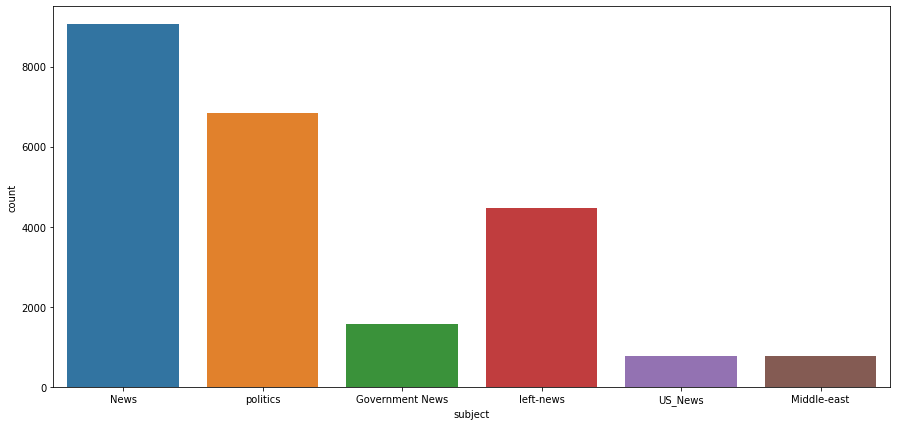

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(fake_data['subject'])

In [17]:
rows_fake_data, colums_fake_data = fake_data.shape
display(fake_data.shape)

(23481, 4)

In [18]:
from collections import Counter
fake_data['word_freq_list'] = fake_data['text'].apply(lambda x: str(x).split())
top=Counter([word for li in fake_data['word_freq_list'] for word in li])
freq_of_words=pd.DataFrame(top.most_common(100))
freq_of_words.columns=["most_common_words","frequency"]
freq_of_words.style.background_gradient(cmap='Blues')

In [19]:
import plotly.express as pe
#import plotly.figure_factory as ff
fig = pe.bar(freq_of_words, x="frequency", y="most_common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='most_common_words')
fig.show()

In [20]:
rows_fake_data_without_duplicates = fake_data.text.value_counts()
display(rows_fake_data_without_duplicates)
print("\nDuplicates in text: " + str(rows_fake_data - len(rows_fake_data_without_duplicates)))



Duplicates in text: 6026


# Data preparation

True and Fake data are currently still stored in two separate files. In order to give these as input to a neural network, we need exactly one file that contains both True and Fake news. Since the original files *Fake.csv* and *True.csv* do not contain any labels, they have to be 'labelled' before they are merged. In addition, the entire file must be mixed well at the end so that the first half of the file does not only contain fake news and the second half only contains true news. In addition, during step 1, the data exploration, it was noticed that some data is duplicated and that there are some unique keywords from newspaper vendors. This data has to be removed and compared afterwards, to be sure that there is still equal amount of data.

## Label the data

In [21]:
true_data["label"] = 1
display(true_data.sample(n=3))

title  \
207    Trump signs defense policy bill, urges U.S. Co...   
11238  Trump, Cruz tensions may provide liveliest Rep...   
19081  U.S.-backed alliance says Russian jets struck ...   

                                                    text       subject  \
207    WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
11238  CHARLESTON, S.C./MANCHESTER, N.H. (Reuters) - ...  politicsNews   
19081  BEIRUT (Reuters) - U.S.-backed Syrian militias...     worldnews   

                      date                                     word_freq_list  \
207     December 12, 2017   [WASHINGTON, (Reuters), -, President, Donald, ...   
11238    January 14, 2016   [CHARLESTON,, S.C./MANCHESTER,, N.H., (Reuters...   
19081  September 25, 2017   [BEIRUT, (Reuters), -, U.S.-backed, Syrian, mi...   

       label  
207        1  
11238      1  
19081      1

In [22]:
fake_data["label"] = 0
display(fake_data.sample(n=3))

title  \
13911  CONGRESSMAN WRITES TELL-ALL BOOK: “I seldom re...   
4668    Veteran Doesn’t Want Your Thanks, He Wants Yo...   
9859   Lou Dobbs Blasts Mueller Investigation: ‘What ...   

                                                    text   subject  \
13911  A Congressman decided to come clean about what...  politics   
4668   Marine Corps Veteran Frank Biggio appreciates ...      News   
9859   Lou Dobbs has had it with this kangaroo court ...  politics   

                     date                                     word_freq_list  \
13911        May 12, 2016  [A, Congressman, decided, to, come, clean, abo...   
4668   September 12, 2016  [Marine, Corps, Veteran, Frank, Biggio, apprec...   
9859         Sep 21, 2017  [Lou, Dobbs, has, had, it, with, this, kangaro...   

       label  
13911      0  
4668       0  
9859       0

## Remove duplicate data

In [23]:
true_data_without_duplicates_in_text = true_data.drop_duplicates("text")
display(true_data_without_duplicates_in_text)

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date                                     word_freq_list  \
0      December 31, 2017   [WASHINGTON, (Reuters), -, The, head, of, a, c...   
1      December 29, 2017   [WASHINGTON, (Reuters), -, Transgender, people...   
2      December 31, 2017   [WASHINGTON, (Reuters), -, The, special, couns...   
3      December 30, 2017   [WASHINGTON, (Reuters), -, Trump, campaign, ad...   
4      December 29, 2017   [SEATTLE/WASHINGTON, (Reuters), -, President, ...   
...                   ...                                                ...   
21412    August 22, 2017   [BRUSSELS, (Reuters), -, NATO, allies, on, Tue...   
21413    August 22, 2017   [LONDON, (Reuters), -, LexisNexis,, a, provide...   
21414    August 22, 2017   [MINSK, (Reuters), -, In, the, shadow, of, dis...   
21415    August 22, 2017   [MOSCOW, (Reuters), -, Vatican, Secretary, of,...   
21416    August 22, 2017   [JAKARTA, (Reuters), -, Indonesia, will, buy, ...   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
21412      1  
21413      1  
21414      1  
21415      1  
21416      1  

[21192 rows x 6 columns]

In [24]:
fake_data_without_duplicates_in_text = fake_data.drop_duplicates("text")
display(fake_data_without_duplicates_in_text)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
22698  The White House and The Theatrics of ‘Gun Cont...   
22699  Activists or Terrorists? How Media Controls an...   
22700  BOILER ROOM – No Surrender, No Retreat, Heads ...   
22701  Federal Showdown Looms in Oregon After BLM Abu...   
22702  A Troubled King: Chicago’s Rahm Emanuel Desper...   

                                                    text  subject  \
0      Donald Trump just couldn t wish all Americans ...     News   
1      House Intelligence Committee Chairman Devin Nu...     News   
2      On Friday, it was revealed that former Milwauk...     News   
3      On Christmas day, Donald Trump announced that ...     News   
4      Pope Francis used his annual Christmas Day mes...     News   
...                                                  ...      ...   
22698  21st Century Wire says All the world s a stage...  US_News   
22699    Randy Johnson 21st Century WireThe majority ...  US_News   
22700  Tune in to the Alternate Current Radio Network...  US_News   
22701  21st Century Wire says A new front has just op...  US_News   
22702  21st Century Wire says It s not that far away....  US_News   

                    date                                     word_freq_list  \
0      December 31, 2017  [Donald, Trump, just, couldn, t, wish, all, Am...   
1      December 31, 2017  [House, Intelligence, Committee, Chairman, Dev...   
2      December 30, 2017  [On, Friday,, it, was, revealed, that, former,...   
3      December 29, 2017  [On, Christmas, day,, Donald, Trump, announced...   
4      December 25, 2017  [Pope, Francis, used, his, annual, Christmas, ...   
...                  ...                                                ...   
22698    January 7, 2016  [21st, Century, Wire, says, All, the, world, s...   
22699    January 7, 2016  [Randy, Johnson, 21st, Century, WireThe, major...   
22700    January 6, 2016  [Tune, in, to, the, Alternate, Current, Radio,...   
22701    January 4, 2016  [21st, Century, Wire, says, A, new, front, has...   
22702    January 2, 2016  [21st, Century, Wire, says, It, s, not, that, ...   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
22698      0  
22699      0  
22700      0  
22701      0  
22702      0  

[17455 rows x 6 columns]

It can be seen that after removing the duplicates, the proportion of fake news data sets has significantly less data than the true news data set. This deviation amounts to about 10% of the total share. To compensate for this, 10% of the fake news data is removed at random after sorting the data.

In [25]:
print( "Differnce between true and fake data lengths from column: " + str(len(true_data_without_duplicates_in_text) - len(fake_data_without_duplicates_in_text)))
print( "Proportion of total data set: " + str( ((len(true_data_without_duplicates_in_text) - len(fake_data_without_duplicates_in_text)) / (len(true_data_without_duplicates_in_text) + len(fake_data_without_duplicates_in_text)))*100 )  + " %")

Differnce between true and fake data lengths from column: 3737
Proportion of total data set: 9.669573317463193 %


## Merge data

Before merging we need to crop the True-dataset such that its shape fits the Fake-dataset.

In [26]:
true_data_without_duplicates_in_text_shuffled = true_data_without_duplicates_in_text.sample(frac=1).reset_index(drop=True)
true_data_without_duplicates_in_text_shuffled = true_data_without_duplicates_in_text.sample(frac=1).reset_index(drop=True)
true_data_without_duplicates_in_text_shuffled_and_cropped = data = true_data_without_duplicates_in_text_shuffled.drop(labels=range(len(true_data_without_duplicates_in_text) - len(fake_data_without_duplicates_in_text)),axis=0).reset_index(drop=True)
display(true_data_without_duplicates_in_text_shuffled_and_cropped)

title  \
0      Some Syrian schools erase Assad but tensions r...   
1      Myanmar says still working with U.N., wants a ...   
2      Trump wins Scottish golf course privacy rights...   
3      Two wanted men injured by Saudi security force...   
4      U.S. Holocaust museum alarmed over 'hateful sp...   
...                                                  ...   
17450  Tillerson's use of email alias at Exxon 'entir...   
17451  Cambodia's Hun Sen challenges EU and U.S. to f...   
17452  About 100,000 Kurds have fled Kirkuk since Mon...   
17453  Trump to begin tax reform push next week, Whit...   
17454  Brazil police raid homes of two lawmakers in b...   

                                                    text       subject  \
0      HAZIMA, Syria (Reuters) - The few bullet-marke...     worldnews   
1      YANGON (Reuters) - Myanmar wants to continue w...     worldnews   
2      LONDON (Reuters) - A grandmother who had sued ...  politicsNews   
3      DUBAI (Reuters) - Two men wanted by Saudi auth...     worldnews   
4      WASHINGTON (Reuters) - The U.S. Holocaust Memo...  politicsNews   
...                                                  ...           ...   
17450  (Reuters) - U.S. Secretary of State Rex Tiller...  politicsNews   
17451  PHNOM PENH (Reuters) - Cambodian Prime Ministe...     worldnews   
17452  BAGHDAD (Reuters) - About 100,000 Kurds have f...     worldnews   
17453  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
17454  BRAS LIA (Reuters) - Brazilian police raided t...     worldnews   

                     date                                     word_freq_list  \
0      September 7, 2017   [HAZIMA,, Syria, (Reuters), -, The, few, bulle...   
1      December 21, 2017   [YANGON, (Reuters), -, Myanmar, wants, to, con...   
2          April 5, 2017   [LONDON, (Reuters), -, A, grandmother, who, ha...   
3      November 10, 2017   [DUBAI, (Reuters), -, Two, men, wanted, by, Sa...   
4      November 22, 2016   [WASHINGTON, (Reuters), -, The, U.S., Holocaus...   
...                   ...                                                ...   
17450     March 17, 2017   [(Reuters), -, U.S., Secretary, of, State, Rex...   
17451  December 15, 2017   [PHNOM, PENH, (Reuters), -, Cambodian, Prime, ...   
17452   October 19, 2017   [BAGHDAD, (Reuters), -, About, 100,000, Kurds,...   
17453    August 25, 2017   [WASHINGTON, (Reuters), -, U.S., President, Do...   
17454  December 13, 2017   [BRAS, LIA, (Reuters), -, Brazilian, police, r...   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
17450      1  
17451      1  
17452      1  
17453      1  
17454      1  

[17455 rows x 6 columns]

After cropping, we can merge the datasets and then shuffle.

In [27]:
true_and_fake_data_cropped = pd.concat([true_data_without_duplicates_in_text_shuffled_and_cropped, fake_data_without_duplicates_in_text],axis=0)
true_and_fake_data_shuffled_cropped = true_and_fake_data_cropped.sample(frac=1).reset_index(drop=True)
display(true_and_fake_data_shuffled_cropped.head(n=20))

title  \
0   Republican Trump's new finance chair previousl...   
1    WATCH: GOP Chair Says ‘People Don’t Care’ Abo...   
2   Instant View: Republicans pull Obamacare repea...   
3    Flint, MI: Ten Dead, Eighty-Seven Infected Wi...   
4   South Sudan Supreme Court judge quits citing l...   
5    Study SHATTERS Conservative Claim That Aborti...   
6   HILLARY GOT DESTROYED By Chris Wallace On FOX ...   
7    WATCH: Trump Just Threatened The Media With ‘...   
8   Trump on Twitter (Aug 7): Fake News, Senator R...   
9   Trump, Lockheed Martin CEO to meet on Friday: ...   
10  NANCY PELOSI Screws Up the Oath of Office Whil...   
11   Federal Judge Rules That Trump DID Incite Vio...   
12   Moron Of The Day: Joe Scarborough Seriously C...   
13  Drug lobby, under criticism, starts media camp...   
14  EU warns U.S. it may respond swiftly to counte...   
15  Obama asks for $11.6 billion more in supplemen...   
16  Boiler Room EP #77 – The Venom of Divide and Rule   
17  CUBAN INVASION: 7,000 Crossing Border Into U.S...   
18  Uzbekistan pulls students, teachers, nurses fr...   
19  Trump tells China's Xi he believes there is so...   

                                                 text       subject  \
0   WASHINGTON (Reuters) - Republican Donald Trump...  politicsNews   
1   Well you really have to hand it to Trump. Now ...          News   
2   (Reuters) - Republican leaders of the House of...  politicsNews   
3   On January 13, 2016, Michigan governor Rick Sn...          News   
4   JUBA (Reuters) - A judge of South Sudan s Supr...     worldnews   
5   Conservatives are lying when they claim bannin...          News   
6   Hillary shouldn t be on FOX News giving interv...      politics   
7   No matter what you think about Buzzfeed publis...          News   
8   The following statements were posted to the ve...  politicsNews   
9   NEW YORK (Reuters) - U.S. President-elect Dona...  politicsNews   
10  Not a day goes by that we have another gaffe f...      politics   
11  Hearing about violence at Trump s rallies was ...          News   
12  Media Matters reports that on Friday morning, ...          News   
13  WASHINGTON (Reuters) - The largest lobbying or...  politicsNews   
14  BRUSSELS (Reuters) - The European Union warned...  politicsNews   
15  WASHINGTON (Reuters) - U.S. President Barack O...  politicsNews   
16  Tune in to the Alternate Current Radio Network...       US_News   
17  Thanks to Obama s open border policy and a rec...      politics   
18  TASHKENT (Reuters) - Uzbekistan has abruptly r...     worldnews   
19  BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   

                   date                                     word_freq_list  \
0          May 5, 2016   [WASHINGTON, (Reuters), -, Republican, Donald,...   
1          May 15, 2016  [Well, you, really, have, to, hand, it, to, Tr...   
2       March 24, 2017   [(Reuters), -, Republican, leaders, of, the, H...   
3      January 14, 2016  [On, January, 13,, 2016,, Michigan, governor, ...   
4    November 14, 2017   [JUBA, (Reuters), -, A, judge, of, South, Suda...   
5     December 14, 2016  [Conservatives, are, lying, when, they, claim,...   
6           Aug 3, 2016  [Hillary, shouldn, t, be, on, FOX, News, givin...   
7      January 11, 2017  [No, matter, what, you, think, about, Buzzfeed...   
8       August 7, 2017   [The, following, statements, were, posted, to,...   
9     January 13, 2017   [NEW, YORK, (Reuters), -, U.S., President-elec...   
10         Jul 30, 2017  [Not, a, day, goes, by, that, we, have, anothe...   
11        April 2, 2017  [Hearing, about, violence, at, Trump, s, ralli...   
12       April 22, 2016  [Media, Matters, reports, that, on, Friday, mo...   
13    January 23, 2017   [WASHINGTON, (Reuters), -, The, largest, lobby...   
14       July 26, 2017   [BRUSSELS, (Reuters), -, The, European, Union,...   
15   November 10, 2016   [WASHINGTON, (Reuters), -, U.S., President, Ba...   
16      October 5, 2016  [Tune, 

## Shuffled and cropped Data Visualization

Plotting the label column of the dataset to check if now there are equal amount of fake data and true data.

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='label', ylabel='count'>

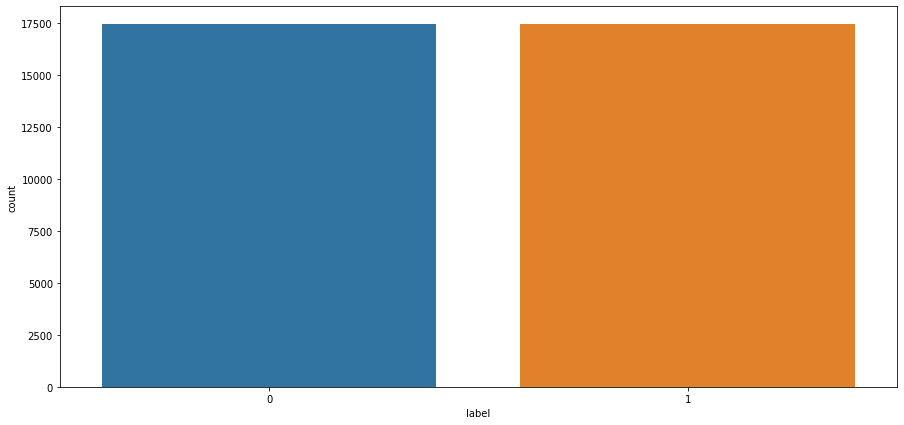

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.countplot(true_and_fake_data_shuffled_cropped['label'])

## Delete unessecary data


### Delete irrelevant data

In [29]:
data = true_and_fake_data_shuffled_cropped.drop(["date","title","subject"],axis=1)
cleaned_data = data.copy() # create two datasets for later evalution
display(data)

text  \
0      WASHINGTON (Reuters) - Republican Donald Trump...   
1      Well you really have to hand it to Trump. Now ...   
2      (Reuters) - Republican leaders of the House of...   
3      On January 13, 2016, Michigan governor Rick Sn...   
4      JUBA (Reuters) - A judge of South Sudan s Supr...   
...                                                  ...   
34905  YANGON (Reuters) - Myanmar s army said on Mond...   
34906  WASHINGTON (Reuters) - U.S. Vice President Mik...   
34907  SAN FRANCISCO (Reuters) - A U.S. federal judge...   
34908  Donald Trump s plan to create a national regis...   
34909  NEW YORK (Reuters) - Americans are more concer...   

                                          word_freq_list  label  
0      [WASHINGTON, (Reuters), -, Republican, Donald,...      1  
1      [Well, you, really, have, to, hand, it, to, Tr...      0  
2      [(Reuters), -, Republican, leaders, of, the, H...      1  
3      [On, January, 13,, 2016,, Michigan, governor, ...      0  
4      [JUBA, (Reuters), -, A, judge, of, South, Suda...      1  
...                                                  ...    ...  
34905  [YANGON, (Reuters), -, Myanmar, s, army, said,...      1  
34906  [WASHINGTON, (Reuters), -, U.S., Vice, Preside...      1  
34907  [SAN, FRANCISCO, (Reuters), -, A, U.S., federa...      1  
34908  [Donald, Trump, s, plan, to, create, a, nation...      0  
34909  [NEW, YORK, (Reuters), -, Americans, are, more...      1  

[34910 rows x 3 columns]

In [30]:
display(cleaned_data)

text  \
0      WASHINGTON (Reuters) - Republican Donald Trump...   
1      Well you really have to hand it to Trump. Now ...   
2      (Reuters) - Republican leaders of the House of...   
3      On January 13, 2016, Michigan governor Rick Sn...   
4      JUBA (Reuters) - A judge of South Sudan s Supr...   
...                                                  ...   
34905  YANGON (Reuters) - Myanmar s army said on Mond...   
34906  WASHINGTON (Reuters) - U.S. Vice President Mik...   
34907  SAN FRANCISCO (Reuters) - A U.S. federal judge...   
34908  Donald Trump s plan to create a national regis...   
34909  NEW YORK (Reuters) - Americans are more concer...   

                                          word_freq_list  label  
0      [WASHINGTON, (Reuters), -, Republican, Donald,...      1  
1      [Well, you, really, have, to, hand, it, to, Tr...      0  
2      [(Reuters), -, Republican, leaders, of, the, H...      1  
3      [On, January, 13,, 2016,, Michigan, governor, ...      0  
4      [JUBA, (Reuters), -, A, judge, of, South, Suda...      1  
...                                                  ...    ...  
34905  [YANGON, (Reuters), -, Myanmar, s, army, said,...      1  
34906  [WASHINGTON, (Reuters), -, U.S., Vice, Preside...      1  
34907  [SAN, FRANCISCO, (Reuters), -, A, U.S., federa...      1  
34908  [Donald, Trump, s, plan, to, create, a, nation...      0  
34909  [NEW, YORK, (Reuters), -, Americans, are, more...      1  

[34910 rows x 3 columns]

### Delete stopwords

In [31]:
import re
import string
import nltk 
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import os
import itertools

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

text_cleaning_keywords = ["washington", "reuters", "moscow", "russia", "beijing",
                          "canada", "london", "new york", "jawzjan", "afghanistan",
                          "kabul", "reno", "nev", "manchester", "seoul", "taipei",
                          "madrid", "beirut", "jalalabad", "paris", "san francisco",
                          "hanoi" ]

def text_cleaning(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    return text

def text_cleaning_2(text):
    for keyword in text_cleaning_keywords:
      text = re.sub(keyword, ' ', str(text).lower()).strip()
    return text

def number_cleaning(text):
    text = ''.join(c for c in text if not c.isdigit())
    return text

def remove_emoji(string):
    emoji_pattern = re.compile(
    "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #FLAGS on (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_punctuation(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

def stemming_words(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    
    return " ".join(text)

cleaned_data["text"] = cleaned_data.text.apply(lambda x: remove_URL(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: remove_html(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: text_cleaning(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: text_cleaning_2(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: number_cleaning(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: remove_emoji(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: remove_punctuation(x))
cleaned_data["text"] = cleaned_data.text.apply(lambda x: stemming_words(x))
cleaned_data["text"] = cleaned_data["text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
display(cleaned_data.head(n=20))

text  \
0   republican donald trump name nation financ cha...   
1   well realli hand trump destroy everi establish...   
2   republican leader hous repres pull legisl over...   
3   januari michigan governor rick snyder held pre...   
4   juba judg south sudan suprem court resign tues...   
5   conserv lie claim ban abort necessari protect ...   
6   hillari fox news give interview jail queen hil...   
7   matter think buzzfe publish dossier unverifi i...   
8   follow statement post verifi twitter account u...   
9   u presid elect donald trump meet lockhe martin...   
10  day goe anoth gaff nanci pelosi term limit ple...   
11  hear violenc trump ralli wa regular occurr dur...   
12  media matter report friday morn joe scarboroug...   
13  largest lobbi organ pharmaceut compani began r...   
14  brussel european union warn wednesday wa readi...   
15  u presid barack obama thursday sent request co...   
16  tune altern current radio network acr anoth li...   
17  thank obama open border polici recent agreemen...   
18  tashkent uzbekistan ha abruptli recal thousand...   
19  u presid donald trump told chines presid xi ji...   

                                       word_freq_list  label  
0   [WASHINGTON, (Reuters), -, Republican, Donald,...      1  
1   [Well, you, really, have, to, hand, it, to, Tr...      0  
2   [(Reuters), -, Republican, leaders, of, the, H...      1  
3   [On, January, 13,, 2016,, Michigan, governor, ...      0  
4   [JUBA, (Reuters), -, A, judge, of, South, Suda...      1  
5   [Conservatives, are, lying, when, they, claim,...      0  
6   [Hillary, shouldn, t, be, on, FOX, News, givin...      0  
7   [No, matter, what, you, think, about, Buzzfeed...      0  
8   [The, following, statements, were, posted, to,...      1  
9   [NEW, YORK, (Reuters), -, U.S., President-elec...      1  
10  [Not, a, day, goes, by, that, we, have, anothe...      0  
11  [Hearing, about, violence, at, Trump, s, ralli...      0  
12  [Media, Matters, reports, that, on, Friday, mo...      0  
13  [WASHINGTON, (Reuters), -, The, largest, lobby...      1  
14  [BRUSSELS, (Reuters), -, The, European, Union,...      1  
15  [WASHINGTON, (Reuters), -, U.S., President, Ba...      1  
16  [Tune, in, to, the, Alternate, Current, Radio,...      0  
17  [Thanks, to, Obama, s, open, border, policy, a...      0  
18  [TASHKENT, (Reuters), -, Uzbekistan, has, abru...      1  
19  [BEIJING, (Reuters), -, U.S., President, Donal...      1

In [33]:
from collections import Counter
display("CLEANED DATA")
data['word_freq_list_merged_clean_data'] = cleaned_data['text'].apply(lambda x: str(x).split())
top=Counter([word for li in data['word_freq_list_merged_clean_data'] for word in li])
freq_of_words_merged_clean_data=pd.DataFrame(top.most_common(100))
freq_of_words_merged_clean_data.columns=["most_common_words","frequency"]
freq_of_words_merged_clean_data.style.background_gradient(cmap='Blues')

'CLEANED DATA'

In [34]:
from wordcloud import WordCloud
display("CLEANED DATA")
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 ).generate(" ".join(cleaned_data[cleaned_data.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

'CLEANED DATA'

In [35]:
display(data.head(n=20))

text  \
0   WASHINGTON (Reuters) - Republican Donald Trump...   
1   Well you really have to hand it to Trump. Now ...   
2   (Reuters) - Republican leaders of the House of...   
3   On January 13, 2016, Michigan governor Rick Sn...   
4   JUBA (Reuters) - A judge of South Sudan s Supr...   
5   Conservatives are lying when they claim bannin...   
6   Hillary shouldn t be on FOX News giving interv...   
7   No matter what you think about Buzzfeed publis...   
8   The following statements were posted to the ve...   
9   NEW YORK (Reuters) - U.S. President-elect Dona...   
10  Not a day goes by that we have another gaffe f...   
11  Hearing about violence at Trump s rallies was ...   
12  Media Matters reports that on Friday morning, ...   
13  WASHINGTON (Reuters) - The largest lobbying or...   
14  BRUSSELS (Reuters) - The European Union warned...   
15  WASHINGTON (Reuters) - U.S. President Barack O...   
16  Tune in to the Alternate Current Radio Network...   
17  Thanks to Obama s open border policy and a rec...   
18  TASHKENT (Reuters) - Uzbekistan has abruptly r...   
19  BEIJING (Reuters) - U.S. President Donald Trum...   

                                       word_freq_list  label  \
0   [WASHINGTON, (Reuters), -, Republican, Donald,...      1   
1   [Well, you, really, have, to, hand, it, to, Tr...      0   
2   [(Reuters), -, Republican, leaders, of, the, H...      1   
3   [On, January, 13,, 2016,, Michigan, governor, ...      0   
4   [JUBA, (Reuters), -, A, judge, of, South, Suda...      1   
5   [Conservatives, are, lying, when, they, claim,...      0   
6   [Hillary, shouldn, t, be, on, FOX, News, givin...      0   
7   [No, matter, what, you, think, about, Buzzfeed...      0   
8   [The, following, statements, were, posted, to,...      1   
9   [NEW, YORK, (Reuters), -, U.S., President-elec...      1   
10  [Not, a, day, goes, by, that, we, have, anothe...      0   
11  [Hearing, about, violence, at, Trump, s, ralli...      0   
12  [Media, Matters, reports, that, on, Friday, mo...      0   
13  [WASHINGTON, (Reuters), -, The, largest, lobby...      1   
14  [BRUSSELS, (Reuters), -, The, European, Union,...      1   
15  [WASHINGTON, (Reuters), -, U.S., President, Ba...      1   
16  [Tune, in, to, the, Alternate, Current, Radio,...      0   
17  [Thanks, to, Obama, s, open, border, policy, a...      0   
18  [TASHKENT, (Reuters), -, Uzbekistan, has, abru...      1   
19  [BEIJING, (Reuters), -, U.S., President, Donal...      1   

                     word_freq_list_merged_clean_data  
0   [republican, donald, trump, name, nation, fina...  
1   [well, realli, hand, trump, destroy, everi, es...  
2   [republican, leader, hous, repres, pull, legis...  
3   [januari, michigan, governor, rick, snyder, he...  
4   [juba, judg, south, sudan, suprem, court, resi...  
5   [conserv, lie, claim, ban, abort, necessari, p...  
6   [hillari, fox, news, give, interview, jail, qu...  
7   [matter, think, buzzfe, publish, dossier, unve...  
8   [follow, statement, post, verifi, twitter, acc...  
9   [u, presid, elect, donald, trump, meet, lockhe...  
10  [day, goe, anoth, gaff, nanci, pelosi, term, l...  
11  [hear, violenc, trump, ralli, wa, regular, occ...  
12  [media, matter, report, friday, morn, joe, sca...  
13  [largest, lobbi, organ, pharmaceut, compani, b...  
14  [brussel, european, union, warn, wednesday, wa...  
15  [u, presid, barack, obama, thursday, sent, req...  
16  [tune, altern, current, radio, network, acr, a...  
17  [thank, obama, open, border, polici, recent, a...  
18  [tashkent, uzbekistan, ha, abruptli, recal, th...  
19  [u, presid, donald, trump, told, chines, presi...

In [36]:
from collections import Counter
display("RAW DATA")
data['word_freq_list_merged_raw_data'] = data['text'].apply(lambda x: str(x).split())
top=Counter([word for li in data['word_freq_list_merged_raw_data'] for word in li])
freq_of_words_merged_raw_data=pd.DataFrame(top.most_common(100))
freq_of_words_merged_raw_data.columns=["most_common_words","frequency"]
freq_of_words_merged_raw_data.style.background_gradient(cmap='Blues')

'RAW DATA'

'RAW DATA'

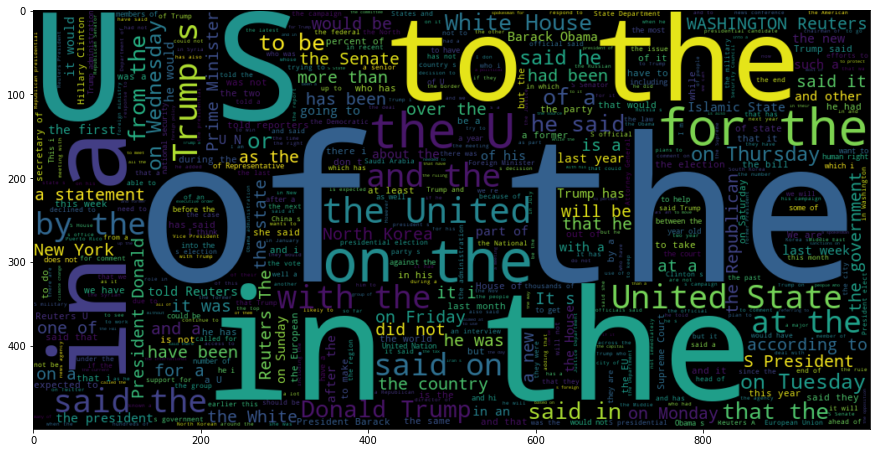

In [37]:
from wordcloud import WordCloud
display("RAW DATA")
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = freq_of_words_merged_raw_data).generate(" ".join(data[data.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

## Split the data into train and test
An easy way to split a dataset into training and testing data is with the *train_test_split* from scikit-learn library. It takes as arguments the input data and labels, together with the train/test rate and returns a tuple.

### Raw dataset

In [38]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.25, train_size = 0.75)

display(train_data.head(n=20))
display(train_data.shape)
print("\n")
display(test_data.head(n=20))
display(test_data.shape)

text  \
22250  WARSAW (Reuters) - President Barack Obama pled...   
28755  Because the government knows best when it come...   
780    Tune in to the Alternate Current Radio Network...   
17188  WASHINGTON (Reuters) - The United States is co...   
18754  Donald Trump is a clear and present threat to ...   
25121  WASHINGTON/TEGUCIGALPA (Reuters) - The United ...   
16841  WASHINGTON (Reuters) - Democratic U.S. preside...   
22023  If you ve been hiding under your bed since Don...   
32837  WASHINGTON (Reuters) - U.S. Republican preside...   
23418  BERLIN (Reuters) - German Chancellor Angela Me...   
2499   WASHINGTON (Reuters) - U.S. President Donald T...   
28501  A super PAC backing Ted Cruz s presidential ca...   
24607  SACRAMENTO, Calif. (Reuters) - California woul...   
23843        THIS IS OUTRAGEOUS! YOU WON T BELIEVE THIS!   
12415  According to The Hill, Democrat Senator Bob Ca...   
12158  Newt Gingrich:  You start putting a few people...   
18698  Donald Trump may deny that his appeal among ri...   
33529  WASHINGTON (Reuters) - U.S. Attorney General J...   
8804   WASHINGTON (Reuters) - House Speaker Paul Ryan...   
21119  Donald Trump may think it s perfectly fine for...   

                                          word_freq_list  label  \
22250  [WARSAW, (Reuters), -, President, Barack, Obam...      1   
28755  [Because, the, government, knows, best, when, ...      0   
780    [Tune, in, to, the, Alternate, Current, Radio,...      0   
17188  [WASHINGTON, (Reuters), -, The, United, States...      1   
18754  [Donald, Trump, is, a, clear, and, present, th...      0   
25121  [WASHINGTON/TEGUCIGALPA, (Reuters), -, The, Un...      1   
16841  [WASHINGTON, (Reuters), -, Democratic, U.S., p...      1   
22023  [If, you, ve, been, hiding, under, your, bed, ...      0   
32837  [WASHINGTON, (Reuters), -, U.S., Republican, p...      1   
23418  [BERLIN, (Reuters), -, German, Chancellor, Ang...      1   
2499   [WASHINGTON, (Reuters), -, U.S., President, Do...      1   
28501  [A, super, PAC, backing, Ted, Cruz, s, preside...      0   
24607  [SACRAMENTO,, Calif., (Reuters), -, California...      1   
23843  [THIS, IS, OUTRAGEOUS!, YOU, WON, T, BELIEVE, ...      0   
12415  [According, to, The, Hill,, Democrat, Senator,...      0   
12158  [Newt, Gingrich:, You, start, putting, a, few,...      0   
18698  [Donald, Trump, may, deny, that, his, appeal, ...      0   
33529  [WASHINGTON, (Reuters), -, U.S., Attorney, Gen...      1   
8804   [WASHINGTON, (Reuters), -, House, Speaker, Pau...      1   
21119  [Donald, Trump, may, think, it, s, perfectly, ...      0   

                        word_freq_list_merged_clean_data  \
22250  [warsaw, presid, barack, obama, pledg, saturda...   
28755  [becaus, govern, know, best, come, rais, child...   
780    [tune, altern, current, radio, network, acr, a...   
17188  [unit, state, concern, physic, well, hunger, s...   
18754  [donald, trump, clear, present, threat, unit, ...   
25121  [tegucigalpa, unit, state, friday, back, elect...   
16841  [democrat, u, presidenti, candid, hillari, cli...   
22023  [hide, bed, sinc, donald, trump, threaten, nor...   
32837  [u, republican, presidenti, candid, ted, cruz,...   
23418  [berlin, german, chancellor, angela, merkel, f...   
2499   [u, presid, donald, trump, attack, news, media...   
28501  [super, pac, back, ted, cruz, presidenti, camp...   
24607  [sacramento, calif, california, would, repeal,...   
23843                         [thi, outrag, believ, thi]   
12415  [accord, hill, democrat, senat, bob, casey, wa...   
12158  [newt, gingrich, start, put, peopl, jail, see,...   
18698  [donald, trump, may, deni, hi, appeal, among, ...   
33529  [u, attorney, gener, jeff, session, tuesday, r...   
8804   [hous, speaker, paul, ryan, polit, oper, sent,...   
21119  [donald, trump, may, think, perfectli, fine, s...   

                          word_freq_list_merged_raw_data  
22250  [WARSAW, (Reuters), -, President, Barack, Obam...  
2875

(26182, 5)

text  \
9300   (Reuters) - U.S. President-elect Donald Trump ...   
7476   GUATEMALA CITY (Reuters) - Guatemalan Presiden...   
8461   The EU has opened the floodgates to Muslims fr...   
9620   Because there wouldn t be any outrage over a  ...   
8290   No matter what candidate you re supporting, th...   
26001  Trump continued to claim credit for things wit...   
20963  RIYADH (Reuters) - Saudi Arabia has released 2...   
9276   PENSACOLA, Fla. (Reuters) - U.S. President Don...   
7173   Interim Democratic National Committee Chairwom...   
32757  (Reuters) - The U.S. Congress is hurtling towa...   
21398  The world is stunned by the number of women an...   
33820  COPENHAGEN (Reuters) - Iceland s opposition le...   
7908   MOSCOW (Reuters) - Russian President Vladimir ...   
22480  Recently, President Bannon s underling, Donald...   
7512   You won t hear this tidbit of good news about ...   
33169  BISHKEK (Reuters) - Kyrgyzstan s state securit...   
21781  You seriously can t make this stuff up Wouldn ...   
24599   Farmers and ranchers are being run off their ...   
8907   North Carolina is stuck in the past and the ci...   
26623  BETHLEHEM, Pennsylvania (Reuters) - The unrave...   

                                          word_freq_list  label  \
9300   [(Reuters), -, U.S., President-elect, Donald, ...      1   
7476   [GUATEMALA, CITY, (Reuters), -, Guatemalan, Pr...      1   
8461   [The, EU, has, opened, the, floodgates, to, Mu...      0   
9620   [Because, there, wouldn, t, be, any, outrage, ...      0   
8290   [No, matter, what, candidate, you, re, support...      0   
26001  [Trump, continued, to, claim, credit, for, thi...      0   
20963  [RIYADH, (Reuters), -, Saudi, Arabia, has, rel...      1   
9276   [PENSACOLA,, Fla., (Reuters), -, U.S., Preside...      1   
7173   [Interim, Democratic, National, Committee, Cha...      0   
32757  [(Reuters), -, The, U.S., Congress, is, hurtli...      1   
21398  [The, world, is, stunned, by, the, number, of,...      0   
33820  [COPENHAGEN, (Reuters), -, Iceland, s, opposit...      1   
7908   [MOSCOW, (Reuters), -, Russian, President, Vla...      1   
22480  [Recently,, President, Bannon, s, underling,, ...      0   
7512   [You, won, t, hear, this, tidbit, of, good, ne...      0   
33169  [BISHKEK, (Reuters), -, Kyrgyzstan, s, state, ...      1   
21781  [You, seriously, can, t, make, this, stuff, up...      0   
24599  [Farmers, and, ranchers, are, being, run, off,...      0   
8907   [North, Carolina, is, stuck, in, the, past, an...      0   
26623  [BETHLEHEM,, Pennsylvania, (Reuters), -, The, ...      1   

                        word_freq_list_merged_clean_data  \
9300   [u, presid, elect, donald, trump, said, interv...   
7476   [guatemala, citi, guatemalan, presid, jimmi, m...   
8461   [eu, ha, open, floodgat, muslim, middl, east, ...   
9620   [becaus, ani, outrag, white, kid, onli, field,...   
8290   [matter, candid, support, thi, great, exampl, ...   
26001  [trump, continu, claim, credit, thing, littl, ...   
20963  [riyadh, saudi, arabia, ha, releas, power, ind...   
9276   [pensacola, fla, u, presid, donald, trump, fri...   
7173   [interim, democrat, nation, committe, chairwom...   
32757  [u, congress, hurtl, toward, major, deadlin, t...   
21398  [world, stun, number, women, children, rape, m...   
33820  [copenhagen, iceland, opposit, leader, katrin,...   
7908   [n, presid, vladimir, putin, phone, palestinia...   
22480  [recent, presid, bannon, underl, donald, trump...   
7512   [hear, thi, tidbit, good, news, donald, trump,...   
33169  [bishkek, kyrgyzstan, state, secur, servic, sa...   
21781  [serious, make, thi, stuff, great, real, hones...   
24599  [farmer, rancher, run, properti, arm, terroris...   
8907   [north, carolina, stuck, past, citi, charlott,...   
26623  [bethlehem, pennsylvania, unravel, coalit, wa,...   

                          word_freq_list_merged_raw_data  
9300   [(Reuters), -, U.S., President-elect, Donald, ...  
7476

(8728, 5)

In [39]:
print("Labels in Train Data: \n")
display(train_data.label.value_counts())
print("\n\nLabels in Test Data: \n")
display(test_data.label.value_counts())

Labels in Train Data: 



1    13128
0    13054
Name: label, dtype: int64



Labels in Test Data: 



0    4401
1    4327
Name: label, dtype: int64

### Cleaned data

In [40]:
train_data_cleaned, test_data_cleaned = train_test_split(cleaned_data, test_size = 0.25, train_size = 0.75)

display(train_data_cleaned.head(n=20))
display(train_data_cleaned.shape)
print("\n")
display(test_data_cleaned.head(n=20))
display(test_data_cleaned.shape)

text  \
26322  easili said donald trump honest person world f...   
18224  ge round syria peac talk end thursday wa big m...   
28522  two suspect dpd custodi follow horrif attack d...   
34900  khartoum sudan expect unit state lift econom s...   
16053  ankara iran revolutionari guard readi help reb...   
15653  rare high level defector north korea told u la...   
13331  face mount threat terror civil unrest u citi p...   
157    st centuri wire say updat pm et due public pre...   
1228   u senat investig meddl dure u elect includ tho...   
22656  tripoli across libya capit resid start drill p...   
18798  presid donald trump consid ad veteran lawyer w...   
9612   mexico citi mexican deleg met u militari offic...   
26956  new mexico republican resort intimid tactic sc...   
9703   lima peru opposit control congress approv pres...   
2400   sao paulo presidenti hope jo doria mayor brazi...   
17894  donald trump anoth bad day earlier thi week tr...   
33238  donald trump first debat hi democrat rival hil...   
9018   presid donald trump consid end program allow y...   
3022   marietta ga anti abort protest ralli score pla...   
30017  republican presidenti candid john kasich promo...   

                                          word_freq_list  label  
26322  [It, can, easily, be, said, that, Donald, Trum...      0  
18224  [GENEVA, (Reuters), -, A, round, of, Syria, pe...      1  
28522  [Two, suspects, are, in, DPD, custody, followi...      0  
34900  [KHARTOUM, (Reuters), -, Sudan, expects, the, ...      1  
16053  [ANKARA, (Reuters), -, Iran, s, Revolutionary,...      1  
15653  [WASHINGTON, (Reuters), -, A, rare, high-level...      1  
13331  [In, the, face, of, mounting, threats, of, ter...      0  
157    [21st, Century, Wire, says..UPDATE, 1-29-2016,...      0  
1228   [WASHINGTON, (Reuters), -, A, U.S., Senate, in...      1  
22656  [TRIPOLI, (Reuters), -, Across, Libya, s, capi...      1  
18798  [(Reuters), -, President, Donald, Trump, is, c...      1  
9612   [MEXICO, CITY, (Reuters), -, A, Mexican, deleg...      1  
26956  [New, Mexico, Republicans, are, resorting, to,...      0  
9703   [LIMA, (Reuters), -, Peru, s, opposition-contr...      1  
2400   [SAO, PAULO, (Reuters), -, Presidential, hopef...      1  
17894  [Donald, Trump, is, having, another, bad, day....      0  
33238  [Donald, Trump, s, first, debate, against, his...      0  
9018   [WASHINGTON, (Reuters), -, President, Donald, ...      1  
3022   [WASHINGTON/MARIETTA,, Ga., (Reuters), -, Anti...      1  
30017  [Republican, presidential, candidate, John, Ka...      0

(26182, 3)

text  \
25302  undercov oper conduct tennesse bureau investig...   
25680  u suprem court monday left place lower court r...   
21251  tri true donald trump support care fuhrer doe ...   
26416  follow situat charlottesvil trump wa one veri ...   
19012  incom u administr tough talk china ha set stag...   
15312  phoenix sens potenti turn point republican pre...   
31864  watch ted cruz complet annihil leftist fals at...   
4278   berlin premier germani popul region warn green...   
17911  ted cruz piec sh countri ha known thi long tim...   
32898  bobbi jindal worst nightmar ha come true poor ...   
1712   damn earli tell dalla massacr white polic offi...   
7982   presid obama put nation guard militari unit st...   
28653  istanbul turkey denizbank said thursday ani de...   
7374   rawalpindi pakistan pakistan friday block road...   
20365  former homeland secur secretari jeh johnson te...   
27532  minneapoli mayor candid raymond dehn propos di...   
5981   unit state veri disappoint tuesday cast veto u...   
6239   democrat republican agre lot agre donald trump...   
6205   trump busi tri convinc world popular presid hi...   
2829   thi hero respons threat islam terror remind us...   

                                          word_freq_list  label  
25302  [An, undercover, operation, conducted, by, the...      0  
25680  [WASHINGTON, (Reuters), -, The, U.S., Supreme,...      1  
21251  [The, tried, and, true, Donald, Trump, support...      0  
26416  [Following, the, situation, in, Charlottesvill...      0  
19012  [WASHINGTON, (Reuters), -, The, incoming, U.S....      1  
15312  [PHOENIX, (Reuters), -, Sensing, a, potential,...      1  
31864  [Watch, Ted, Cruz, completely, annihilate, the...      0  
4278   [BERLIN, (Reuters), -, The, premier, of, Germa...      1  
17911  [Ted, Cruz, is, a, piece, of, sh*t., Most, of,...      0  
32898  [Bobby, Jindal, s, worst, nightmare, has, come...      0  
1712   [So, it, s, just, too, damn, early, to, tell, ...      0  
7982   [President, Obama, should, put, the, National,...      0  
28653  [ISTANBUL, (Reuters), -, Turkey, s, Denizbank,...      1  
7374   [RAWALPINDI,, Pakistan, (Reuters), -, Pakistan...      1  
20365  [WASHINGTON, (Reuters), -, Former, Homeland, S...      1  
27532  [Minneapolis, mayoral, candidate, Raymond, Deh...      0  
5981   [WASHINGTON, (Reuters), -, The, United, States...      1  
6239   [Democrats, and, Republicans, don, t, agree, o...      0  
6205   [While, Trump, is, busy, trying, to, convince,...      0  
2829   [This, hero, s, response, to, the, threat, of,...      0

(8728, 3)

## Tokenize the raw data

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [42]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'the': 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'in': 7, 'that': 8, 's': 9, 'on': 10, 'for': 11, 'is': 12, 'he': 13, 'said': 14, 'trump': 15, 'it': 16, 'with': 17, 'was': 18, 'as': 19, 'his': 20, 'by': 21, 'has': 22, 'be': 23, 'have': 24, 'not': 25, 'from': 26, 'this': 27, 'at': 28, 'are': 29, 'who': 30, 'they': 31, 'an': 32, 'but': 33, 'i': 34, 'would': 35, 'we': 36, 'president': 37, 'u': 38, 'about': 39, 'will': 40, 't': 41, 'you': 42, 'their': 43, 'had': 44, 'people': 45, 'been': 46, '”': 47, 'or': 48, 'more': 49, 'were': 50, 'which': 51, 'one': 52, 'she': 53, 'after': 54, 'if': 55, 'her': 56, 'out': 57, 'all': 58, 'what': 59, 'state': 60, 'when': 61, 'up': 62, 'also': 63, 'new': 64, 'reuters': 65, 'donald': 66, 'there': 67, 'its': 68, 'no': 69, 'so': 70, 'over': 71, 'house': 72, 'him': 73, 'republican': 74, 'government': 75, 'can': 76, 'states': 77, 'our': 78, 'just': 79, 'clinton': 80, 'than': 81, 'other': 82, 'obama': 83, 'some': 84, 'year': 85, 'could': 86, 'united': 

In [43]:
training_sequences = tokenizer.texts_to_sequences(train_data.text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_data.text)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [44]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(train_data.label.to_list())
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_data.label.to_list())

## Tokenize the cleaned data

In [45]:
tokenizer_cleaned = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer_cleaned.fit_on_texts(train_data_cleaned.text)

word_index_cleaned = tokenizer_cleaned.word_index
print(word_index_cleaned)

{'<OOV>': 1, 'trump': 2, 'said': 3, 'wa': 4, 'hi': 5, 'ha': 6, 'thi': 7, 'state': 8, 'presid': 9, 'would': 10, 'u': 11, 'peopl': 12, 'republican': 13, 'year': 14, 'one': 15, 'say': 16, 'elect': 17, 'also': 18, 'like': 19, 'donald': 20, 'govern': 21, 'hous': 22, 'time': 23, 'report': 24, 'democrat': 25, 'clinton': 26, 'nation': 27, 'obama': 28, 'call': 29, 'support': 30, 'countri': 31, 'unit': 32, 'campaign': 33, 'american': 34, 'go': 35, 'right': 36, 'parti': 37, 'make': 38, 'could': 39, 'senat': 40, 'white': 41, 'told': 42, 'becaus': 43, 'vote': 44, 'two': 45, 'offici': 46, 'last': 47, 'new': 48, 'get': 49, 'ani': 50, 'use': 51, 'want': 52, 'even': 53, 'includ': 54, 'take': 55, 'work': 56, 'offic': 57, 'polit': 58, 'news': 59, 'onli': 60, 'law': 61, 'first': 62, 'back': 63, 'group': 64, 'imag': 65, 'day': 66, 'secur': 67, 'former': 68, 'week': 69, 'dure': 70, 'show': 71, 'court': 72, 'mani': 73, 'n': 74, 'befor': 75, 'attack': 76, 'think': 77, 'know': 78, 'plan': 79, 'hillari': 80, 'c

In [46]:
training_sequences_cleaned = tokenizer_cleaned.texts_to_sequences(train_data_cleaned.text)
training_padded_cleaned = pad_sequences(training_sequences_cleaned, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences_cleaned = tokenizer_cleaned.texts_to_sequences(test_data_cleaned.text)
testing_padded_cleaned = pad_sequences(testing_sequences_cleaned, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [47]:
import numpy as np
training_padded_cleaned = np.array(training_padded_cleaned)
training_labels_cleaned = np.array(train_data_cleaned.label.to_list())
testing_padded_cleaned = np.array(testing_padded_cleaned)
testing_labels_cleaned = np.array(test_data_cleaned.label.to_list())

# Modelling

## Feed Forward Neural Network (FFNN) Model with raw data

In [49]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Embedding, Dropout
model = Sequential()
model.add(Embedding(vocab_size,output_dim=embedding_dim,input_length = max_length))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 16)           160000    
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [50]:
num_epochs = 5
history_raw = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/5
819/819 [==============================] - 3s 3ms/step - loss: 0.3843 - accuracy: 0.7946 - val_loss: 0.0567 - val_accuracy: 0.9789
Epoch 2/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 3/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0126 - val_accuracy: 0.9960
Epoch 4/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0138 - val_accuracy: 0.9964
Epoch 5/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0142 - val_accuracy: 0.9960


In [51]:
import matplotlib.pyplot as plt

plt.plot(history_raw.history['loss'], label='Mean Absolute Error (training data)')
plt.plot(history_raw.history['val_loss'], label='Mean Absolute Error (validation data)')
plt.title('MAE on raw data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [52]:
plt.plot(history_raw.history['accuracy'], label='Accuracy (training data)')
plt.plot(history_raw.history['val_accuracy'], label='Validation Accuracy (validation data)')
plt.title('Accuracy on raw data')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Recurrent Neural Network (RNN) Model with raw data

In [53]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=16))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(256))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               69888     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 230,145
Trainable params: 230,145
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(training_padded, training_labels, verbose =1, epochs=5, validation_data=(testing_padded, testing_labels), batch_size=30, shuffle=True)

Epoch 1/5
873/873 [==============================] - 73s 83ms/step - loss: 0.3773 - accuracy: 0.8079 - val_loss: 0.0416 - val_accuracy: 0.9926
Epoch 2/5
873/873 [==============================] - 73s 84ms/step - loss: 0.1263 - accuracy: 0.9679 - val_loss: 0.0296 - val_accuracy: 0.9943
Epoch 3/5
873/873 [==============================] - 74s 85ms/step - loss: 0.0308 - accuracy: 0.9923 - val_loss: 0.0215 - val_accuracy: 0.9960
Epoch 4/5
873/873 [==============================] - 73s 84ms/step - loss: 0.0144 - accuracy: 0.9978 - val_loss: 0.0190 - val_accuracy: 0.9963
Epoch 5/5
873/873 [==============================] - 73s 83ms/step - loss: 0.0119 - accuracy: 0.9981 - val_loss: 0.0189 - val_accuracy: 0.9967


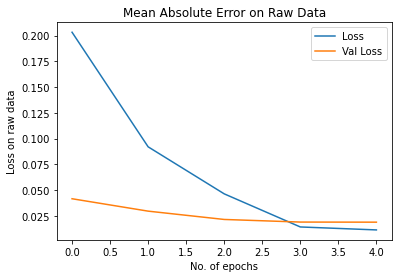

In [55]:
plt.plot(history.history['loss'], label='Loss ')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Absolute Error on Raw Data')
plt.ylabel('Loss on raw data')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

In [56]:
# Plot history: MAE
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Raw Data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Long Short Term Model (LSTM) Model with raw data

In [57]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs['accuracy']>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length,trainable=True),
    tf.keras.layers.LSTM(units=64, return_sequences = True ),
    tf.keras.layers.LSTM(units = 16),
    tf.keras.layers.Dense(units = 32 , activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 16)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 300, 64)           20736     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 186,497
Trainable params: 186,497
Non-trainable params: 0
________________________________________________

In [60]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1, batch_size=32,callbacks=[callbacks])

Epoch 1/30
819/819 [==============================] - 120s 144ms/step - loss: 0.6574 - accuracy: 0.6146 - val_loss: 0.3508 - val_accuracy: 0.8792
Epoch 2/30
819/819 [==============================] - 116s 141ms/step - loss: 0.3495 - accuracy: 0.8921 - val_loss: 0.2588 - val_accuracy: 0.9279
Epoch 3/30
819/819 [==============================] - 115s 140ms/step - loss: 0.2683 - accuracy: 0.9330 - val_loss: 0.2534 - val_accuracy: 0.9300
Epoch 4/30
819/819 [==============================] - 115s 140ms/step - loss: 0.2666 - accuracy: 0.9326 - val_loss: 0.2440 - val_accuracy: 0.9338
Epoch 5/30
819/819 [==============================] - 115s 140ms/step - loss: 0.2548 - accuracy: 0.9360 - val_loss: 0.2307 - val_accuracy: 0.9386
Epoch 6/30
819/819 [==============================] - 115s 141ms/step - loss: 0.2458 - accuracy: 0.9392 - val_loss: 0.2191 - val_accuracy: 0.9423
Epoch 7/30
819/819 [==============================] - 115s 140ms/step - loss: 0.2251 - accuracy: 0.9460 - val_loss: 0.1856 -

In [61]:
# Plot history: loss and val_loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss on raw dataset')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(loc="upper right")
plt.show()

In [62]:
# Plot history: accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy on raw dataset')
plt.ylabel('acc value')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

## Feed Forward Neural Network (FFNN) Model with cleaned data

*   use the "cleaned_data" variable

In [63]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=embedding_dim,input_length = max_length))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 16)           160000    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2176      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [64]:
num_epochs_cleaned = 5
history_cleaned = model.fit(training_padded_cleaned, training_labels_cleaned, epochs=num_epochs_cleaned, validation_data=(testing_padded_cleaned, testing_labels_cleaned), verbose=1)

Epoch 1/5
819/819 [==============================] - 12s 14ms/step - loss: 0.4040 - accuracy: 0.7736 - val_loss: 0.0970 - val_accuracy: 0.9647
Epoch 2/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0811 - accuracy: 0.9735 - val_loss: 0.0831 - val_accuracy: 0.9690
Epoch 3/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0528 - accuracy: 0.9822 - val_loss: 0.0821 - val_accuracy: 0.9695
Epoch 4/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0819 - val_accuracy: 0.9710
Epoch 5/5
819/819 [==============================] - 2s 3ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0810 - val_accuracy: 0.9738


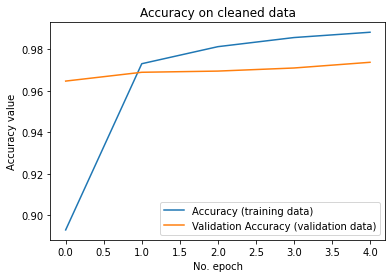

In [65]:
plt.plot(history_cleaned.history['accuracy'], label='Accuracy (training data)')
plt.plot(history_cleaned.history['val_accuracy'], label='Validation Accuracy (validation data)')
plt.title('Accuracy on cleaned data')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

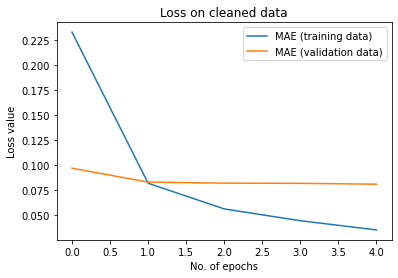

In [66]:
plt.plot(history_cleaned.history['loss'], label='MAE (training data)')
plt.plot(history_cleaned.history['val_loss'], label='MAE (validation data)')
plt.title('Loss on cleaned data')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

## Recurrent Neural Network (RNN) Model with cleaned data

In [80]:
RNN_model = keras.Sequential()
RNN_model.add(layers.Embedding(input_dim=10000, output_dim=16))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
RNN_model.add(layers.SimpleRNN(256))
RNN_model.add(layers.Dense(1, activation='sigmoid'))

RNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               69888     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 230,145
Trainable params: 230,145
Non-trainable params: 0
_________________________________________________________________


In [81]:
#Simple RNN with Cleaned Data
RNN_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history_cleaned = RNN_model.fit(training_padded_cleaned , training_labels_cleaned, verbose =1, epochs=10, validation_data=(testing_padded_cleaned, testing_labels_cleaned), batch_size=30, shuffle=True)

Epoch 1/10
873/873 [==============================] - 82s 82ms/step - loss: 0.6942 - accuracy: 0.5100 - val_loss: 0.6799 - val_accuracy: 0.5592
Epoch 2/10
873/873 [==============================] - 71s 81ms/step - loss: 0.6893 - accuracy: 0.5334 - val_loss: 0.7086 - val_accuracy: 0.4508
Epoch 3/10
873/873 [==============================] - 71s 81ms/step - loss: 0.6847 - accuracy: 0.5520 - val_loss: 0.7192 - val_accuracy: 0.5441
Epoch 4/10
873/873 [==============================] - 71s 81ms/step - loss: 0.5467 - accuracy: 0.7425 - val_loss: 0.4590 - val_accuracy: 0.8114
Epoch 5/10
873/873 [==============================] - 71s 81ms/step - loss: 0.4056 - accuracy: 0.8454 - val_loss: 0.4125 - val_accuracy: 0.8381
Epoch 6/10
873/873 [==============================] - 71s 81ms/step - loss: 0.3478 - accuracy: 0.8763 - val_loss: 0.3855 - val_accuracy: 0.8547
Epoch 7/10
873/873 [==============================] - 71s 81ms/step - loss: 0.3085 - accuracy: 0.8923 - val_loss: 0.3637 - val_accuracy:

In [82]:
plt.plot(history_cleaned.history['loss'], label='MAE (Loss)')
plt.plot(history_cleaned.history['val_loss'], label='MAE (validation Loss)')
plt.title('Cleaned Data')
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

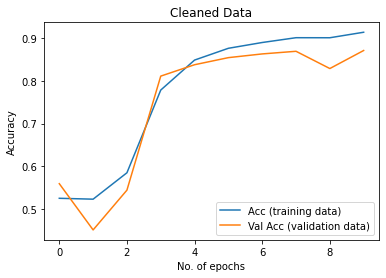

In [83]:
plt.plot(history_cleaned.history['accuracy'], label='Acc (training data)')
plt.plot(history_cleaned.history['val_accuracy'], label='Val Acc (validation data)')
plt.title('Cleaned Data')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(loc="lower right")
plt.show()

## Long Short Term Model (LSTM) Model with cleaned data

In [76]:
model_cleaned = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length,trainable=True),
    tf.keras.layers.LSTM(units=64, return_sequences = True ),
    tf.keras.layers.LSTM(units = 16),
    tf.keras.layers.Dense(units = 32 , activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cleaned.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [77]:
num_epochs_cleaned = 10
history_cleaned = model_cleaned.fit(training_padded_cleaned, training_labels_cleaned, epochs=num_epochs_cleaned, validation_data=(testing_padded_cleaned, testing_labels_cleaned), verbose=1,batch_size=32)

Epoch 1/10
819/819 [==============================] - 120s 143ms/step - loss: 0.6872 - accuracy: 0.5336 - val_loss: 0.5699 - val_accuracy: 0.6730
Epoch 2/10
819/819 [==============================] - 119s 146ms/step - loss: 0.5435 - accuracy: 0.7042 - val_loss: 0.3911 - val_accuracy: 0.8466
Epoch 3/10
819/819 [==============================] - 118s 144ms/step - loss: 0.4403 - accuracy: 0.8278 - val_loss: 0.3787 - val_accuracy: 0.8515
Epoch 4/10
819/819 [==============================] - 116s 142ms/step - loss: 0.3484 - accuracy: 0.8839 - val_loss: 0.2197 - val_accuracy: 0.9460
Epoch 5/10
819/819 [==============================] - 117s 142ms/step - loss: 0.2251 - accuracy: 0.9471 - val_loss: 0.2979 - val_accuracy: 0.9200
Epoch 6/10
819/819 [==============================] - 116s 142ms/step - loss: 0.2490 - accuracy: 0.9373 - val_loss: 0.2235 - val_accuracy: 0.9346
Epoch 7/10
819/819 [==============================] - 115s 141ms/step - loss: 0.2200 - accuracy: 0.9428 - val_loss: 0.2914 -

In [78]:
# Plot history: loss and val_loss on cleaned dataset
plt.plot(history_cleaned.history['loss'], label='loss')
plt.plot(history_cleaned.history['val_loss'], label='validation_loss')
plt.title('Loss on cleaned dataset')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(loc="upper right")
plt.show()

In [79]:
# Plot history: accuracy and validation accuracy on cleaned dataset
plt.plot(history_cleaned.history['accuracy'], label='acc')
plt.plot(history_cleaned.history['val_accuracy'], label='val_acc')
plt.title('Accuracy on cleaned dataset')
plt.ylabel('acc value')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

# Conclusion

In [74]:
from tabulate import tabulate
table = [["Training Accuracy on Raw data",0.9992,0.9765,0.9626],["Validation Accuracy on Raw data",0.9948,0.9789,0.9657],["Training Accuracy on Cleaned data",0.9877,0.8636,0.9580],["Validation Accuracy on Cleaned data",0.9756,0.8421,0.9457]]
print(tabulate(table, headers=["Models","Feed Forward Neural Network", "Recurrent Neural Network", "Long Short-Term Memory"],tablefmt='fancy_grid'))

╒═════════════════════════════════════╤═══════════════════════════════╤════════════════════════════╤══════════════════════════╕
│ Models                              │   Feed Forward Neural Network │   Recurrent Neural Network │   Long Short-Term Memory │
╞═════════════════════════════════════╪═══════════════════════════════╪════════════════════════════╪══════════════════════════╡
│ Training Accuracy on Raw data       │                        0.9992 │                     0.9765 │                   0.9626 │
├─────────────────────────────────────┼───────────────────────────────┼────────────────────────────┼──────────────────────────┤
│ Validation Accuracy on Raw data     │                        0.9948 │                     0.9789 │                   0.9657 │
├─────────────────────────────────────┼───────────────────────────────┼────────────────────────────┼──────────────────────────┤
│ Training Accuracy on Cleaned data   │                        0.9877 │                     0.8636 │    